<a href="https://colab.research.google.com/github/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/blob/main/notebooks/decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library yang Digunakan**

Berikut adalah library yang digunakan dalam proyek klasifikasi teks ini. Setiap library memiliki peran penting dalam tahapan analisis data, mulai dari pemrosesan data hingga pemodelan dan evaluasi.


In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih menarik
import graphviz # Untuk visualisasi graphviz
import nltk # Untuk pra-pemrosesan teks lebih lanjut
from nltk.stem import WordNetLemmatizer # Untuk lemmatization
from nltk.corpus import stopwords as nltk_stopwords # Untuk custom stop words

# Download resource NLTK yang mungkin dibutuhkan
# Catch the LookupError directly when nltk.data.find fails
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK resource 'wordnet' not found. Downloading...")
    nltk.download('wordnet')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'wordnet': {e}")

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("NLTK resource 'omw-1.4' not found. Downloading...")
    nltk.download('omw-1.4') # WordNet multilingual resource
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'omw-1.4': {e}")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK resource 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'stopwords': {e}")


# Pengaturan umum untuk plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Atau palet lain seperti 'pastel', 'muted'

NLTK resource 'wordnet' not found. Downloading...
NLTK resource 'omw-1.4' not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Berikut adalah daftar library Python yang di-import untuk menjalankan analisis sentimen menggunakan model Decision Tree ini. Setiap library memainkan peran spesifik dalam alur kerja machine learning, mulai dari pemuatan data, pra-pemrosesan, pemodelan, hingga evaluasi dan visualisasi.

*   `pandas` (`pd`): Digunakan untuk manipulasi dan analisis data tabular, terutama untuk memuat dan mengelola dataset.
*   `numpy` (`np`): Menyediakan dukungan untuk array dan matriks multidimensi besar, bersama dengan kumpulan fungsi matematika tingkat tinggi untuk beroperasi pada array ini.
*   `sklearn.model_selection`:
    *   `train_test_split`: Untuk membagi dataset menjadi set pelatihan dan pengujian.
    *   `GridSearchCV`: Untuk melakukan pencarian hyperparameter terbaik secara sistematis menggunakan cross-validation.
    *   `cross_val_score`: Untuk mengevaluasi performa model menggunakan cross-validation.
*   `sklearn.feature_extraction.text`:
    *   `TfidfVectorizer`: Untuk mengubah koleksi dokumen teks mentah menjadi matriks fitur TF-IDF.
*   `sklearn.tree`:
    *   `DecisionTreeClassifier`: Implementasi algoritma Decision Tree untuk klasifikasi.
    *   `plot_tree`: Untuk memvisualisasikan pohon keputusan secara langsung menggunakan matplotlib.
    *   `export_graphviz`: Untuk mengekspor pohon keputusan dalam format DOT, yang kemudian dapat dirender oleh Graphviz.
*   `sklearn.metrics`:
    *   `accuracy_score`: Untuk menghitung akurasi klasifikasi.
    *   `confusion_matrix`: Untuk menghitung confusion matrix guna mengevaluasi akurasi klasifikasi.
    *   `classification_report`: Untuk membangun laporan teks yang menunjukkan metrik klasifikasi utama (precision, recall, F1-score).
    *   `ConfusionMatrixDisplay`: Untuk memvisualisasikan confusion matrix.
    *   `roc_auc_score` dan `roc_curve`: Untuk mengevaluasi performa model klasifikasi biner menggunakan kurva ROC dan AUC.
*   `matplotlib.pyplot` (`plt`): Library plotting 2D yang komprehensif untuk membuat visualisasi statis, animasi, dan interaktif.
*   `seaborn` (`sns`): Library visualisasi data Python berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
*   `graphviz`: Digunakan untuk merender output dari `export_graphviz` (file DOT) menjadi representasi grafis dari pohon keputusan.
*   `nltk` (Natural Language Toolkit): Platform utama untuk membangun program Python untuk bekerja dengan data bahasa manusia.
    *   `WordNetLemmatizer`: Untuk melakukan lemmatisasi (mengubah kata ke bentuk dasarnya/lemma).
    *   `nltk_stopwords`: Menyediakan daftar stop words umum.

## **2. Import Dataset yang Digunakan**


Dataset yang digunakan dalam analisis sentimen ini adalah `ramadan_labeled_sentiment.csv`. Dataset ini berisi tweet yang berkaitan dengan Ramadan beserta label sentimennya (positif atau negatif) dan skor sentimen lainnya.


In [106]:
path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv'
df = pd.read_csv(path)

### **a. Menampilkan 5 baris pertama dataset**

In [107]:
df.head()

,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,negative,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0.147,0.853,0.000,-0.4767
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,positive,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.000,0.714,0.286,0.4939
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,positive,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.775,0.225,0.4939


### **b. Menampilkan informasi umum dataset**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_clean       836 non-null    object 
 1   Tweet             836 non-null    object 
 2   sentiment         836 non-null    object 
 3   sentiment_scores  836 non-null    object 
 4   neg               836 non-null    float64
 5   neu               836 non-null    float64
 6   pos               836 non-null    float64
 7   compound          836 non-null    float64
dtypes: float64(4), object(4)
memory usage: 52.4+ KB


### **c. Menampilkan statistik deskriptif untuk kolom numerik (jika ada yang relevan selain skor sentimen)**

In [109]:
df.describe(include='all')

,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound
count,836,836,836,836,836.000000,836.000000,836.000000,836.000000
unique,836,836,2,572,NaN,NaN,NaN,NaN
top,"['zarafshan', 'shiraz', 'hindustan', 'times', ...",zarafshan shiraz hindustan times confirms horm...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,NaN,NaN
freq,1,1,446,226,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.071161,0.710489,0.218349,0.238149
std,NaN,NaN,NaN,NaN,0.126909,0.226460,0.220916,0.486629
min,NaN,NaN,NaN,NaN,0.000000,0.095000,0.000000,-0.976100
25%,NaN,NaN,NaN,NaN,0.000000,0.536000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.691500,0.180000,0.202300
75%,NaN,NaN,NaN,NaN,0.115250,1.000000,0.372000,0.659700


### **d. Menampilkan distribusi kelas sentimen**

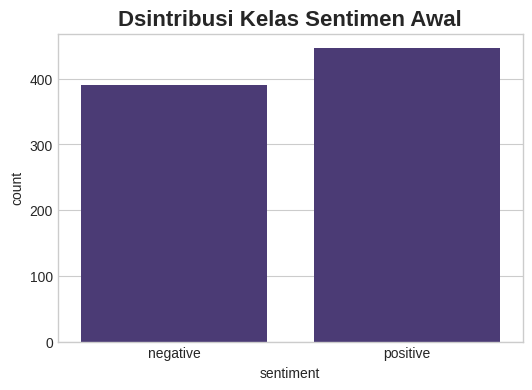

,count
sentiment,
positive,446
negative,390


In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.title('Dsintribusi Kelas Sentimen Awal', fontsize=16, fontweight='bold')
plt.show()
df['sentiment'].value_counts()

### **e. Menampilkan jumlah dan persentase menggunakan Pie Plot**

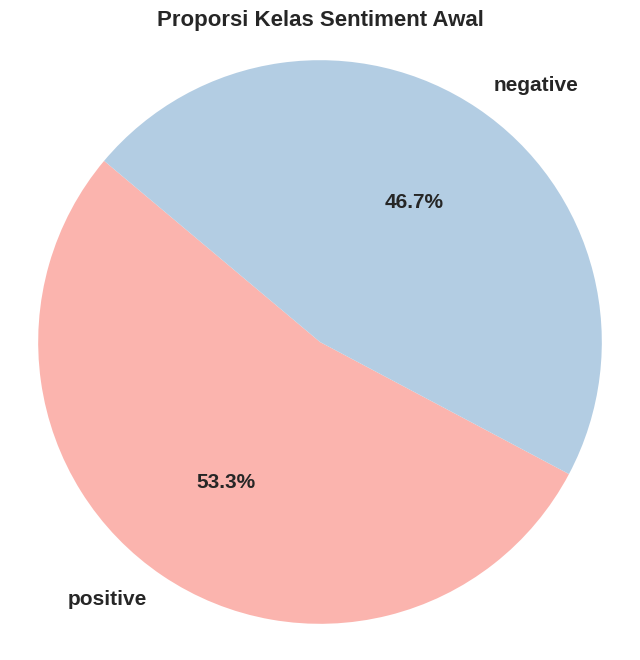


Proporsi Persentase Kelas Sentimen Awal:


,proportion
sentiment,
positive,53.349282
negative,46.650718


In [111]:
# palet warna untuk visualisasi (opsional, jika ingin mengganti palet)
# selected_palette = 'magma'
# sns.set_palette(selected_palette)

sentiment_counts = df['sentiment'].value_counts()
# Mengambil label indeks (0 dan 1)
sentiment_labels_raw = sentiment_counts.index
# Mengganti label angka 0 dan 1 dengan teks yang lebih deskriptif jika diinginkan
sentiment_labels_display = ['Negative', 'Positive'] # Bisa digunakan jika ingin teks 'Negative', 'Positive'

plt.figure(figsize=(8, 8))

# Membuat pie plot dan menangkap objek wedges (slice) dan teks
wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    labels=sentiment_labels_raw, # Menggunakan label indeks (0 dan 1)
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Pastel1'),
    textprops=dict(fontsize=15) # Atur ukuran font untuk semua teks (label dan persentase)
)

# Membuat label di luar lingkaran menjadi bold
for text in texts:
    text.set_fontweight('bold')

# Membuat persentase di dalam lingkaran menjadi bold dan mungkin sedikit lebih besar
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(15)

plt.title('Proporsi Kelas Sentiment Awal', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print("\nProporsi Persentase Kelas Sentimen Awal:")
display(df['sentiment'].value_counts(normalize=True) * 100)

## **- Tahap Pra-Pemrosesan Data (Data Preprocessing)**


Meskipun tidak secara eksplisit diminta dalam urutan nomor 1-6, tahap ini sangat penting untuk menyiapkan data sebelum dilakukan pemodelan.
Ini mencakup:
1. Konversi label sentimen kategorikal menjadi numerik.
2. Pengecekan dan penanganan nilai yang hilang (jika ada).
3. Pemrosesan kolom `tweet_clean` yang berisi list kata menjadi string tunggal agar dapat diproses oleh `TfidfVectorizer`.

### **a. Konversi Label Sentimen ke Numerik**

Label sentimen yang awalnya 'positive' dan 'negative' akan diubah menjadi representasi numerik (misalnya, 1 untuk positif dan 0 untuk negatif) agar dapat digunakan oleh model machine learning.

Label sentimen sebelum konversi:

In [112]:
df[['Tweet', 'sentiment']].head(10)

,Tweet,sentiment
0,abraj al bait clock tower beams indicating com...,negative
1,accounts recognised ramadan none recognised be...,negative
2,admin post peaceful ramadan celebrations east ...,positive
3,admin post ramadan norway,negative
4,admin post ramadan usual peaceful start englan...,positive
5,alfas inside mega chicken afternoon ramadan,negative
6,alhamdulillah every lesson every prayer brings...,positive
7,allah forgive us sins past future public priva...,positive
8,allah help brothers gaza lift siege brothers d...,positive
9,allah help us al-aqsa prisons oppressors gaza ...,negative


Label sentimen setelah konversi:

In [113]:
df['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [114]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df[['Tweet', 'sentiment']].head(10)

,Tweet,sentiment
0,abraj al bait clock tower beams indicating com...,0
1,accounts recognised ramadan none recognised be...,0
2,admin post peaceful ramadan celebrations east ...,1
3,admin post ramadan norway,0
4,admin post ramadan usual peaceful start englan...,1
5,alfas inside mega chicken afternoon ramadan,0
6,alhamdulillah every lesson every prayer brings...,1
7,allah forgive us sins past future public priva...,1
8,allah help brothers gaza lift siege brothers d...,1
9,allah help us al-aqsa prisons oppressors gaza ...,0


### **b. Penanganan Missing Values:**


Sangat penting untuk memeriksa apakah ada nilai yang hilang dalam dataset, terutama pada kolom yang akan digunakan untuk fitur (`tweet_clean`) dan target (`sentiment`).


Jumlah missing values per kolom sebelum penanganan:

In [115]:
df.isnull().sum()

,0
tweet_clean,0
Tweet,0
sentiment,0
sentiment_scores,0
neg,0
neu,0
pos,0
compound,0


### **c. Pemrosesan Kolom Teks Fitur:**


Kolom `tweet_clean` saat ini tampaknya berisi string yang merepresentasikan list. Ini perlu diubah menjadi string tunggal dari kata-kata yang digabungkan.


In [116]:
# Fungsi untuk menggabungkan list kata menjadi string
def join_text_list(text_list_str):
    if isinstance(text_list_str, str):
        try:
            # Mengubah string representasi list menjadi list aktual
            actual_list = eval(text_list_str)
            if isinstance(actual_list, list):
                return ' '.join(actual_list)
            else:
                return '' # atau text_list_str jika formatnya tidak terduga tapi ingin dipertahankan
        except (SyntaxError, NameError, TypeError):
            # Jika eval gagal (misal karena sudah string), kembalikan string aslinya
            # Atau bisa jadi ini adalah teks yang memang tidak berbentuk list
            return text_list_str
    elif isinstance(text_list_str, list): # Jika sudah berupa list
        return ' '.join(text_list_str)
    return '' # Default jika input tidak sesuai

df['text_processed'] = df['tweet_clean'].apply(join_text_list)

print("\nContoh hasil 'text_processed':")
display(df[['tweet_clean', 'text_processed']].head())


Contoh hasil 'text_processed':


,tweet_clean,text_processed
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...


## **- Tahap Ekstraksi Fitur (TF-IDF Vectorization)**

Setelah pra-pemrosesan dasar, teks perlu diubah menjadi format numerik yang dapat dipahami oleh model. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang umum digunakan untuk ini.


In [117]:
tfidf = TfidfVectorizer(
    max_features=1000,    # Membatasi jumlah fitur hingga 1000 kata paling relevan
    ngram_range=(1,2),    # Mempertimbangkan unigram (kata tunggal) dan bigram (pasangan kata)
    stop_words='english'  # Menghapus kata-kata umum dalam bahasa Inggris
)

X = tfidf.fit_transform(df['text_processed'])
y = df['sentiment']

print(f"Shape dari matriks fitur X (setelah TF-IDF): {X.shape}")
print(f"Shape dari vektor target y: {y.shape}")
print("\nContoh beberapa fitur yang dihasilkan oleh TF-IDF:")
print(list(tfidf.get_feature_names_out())[:20]) # Menampilkan 20 fitur pertama

Shape dari matriks fitur X (setelah TF-IDF): (836, 1000)
Shape dari vektor target y: (836,)

Contoh beberapa fitur yang dihasilkan oleh TF-IDF:
['able', 'abu', 'accept', 'accepted', 'according', 'accounts', 'act', 'action', 'acts', 'additionally', 'admin', 'admin post', 'ago', 'ah', 'ahead', 'ahmed', 'aid', 'al', 'al aqsa', 'alaqsamosque']


## **3. Pemrosesan Pembagian (Split Data) Data Training dan Data Testing**


Dataset akan dibagi menjadi dua bagian: data training (untuk melatih model) dan data testing (untuk menguji performa model pada data yang belum pernah dilihat sebelumnya).


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% data digunakan untuk testing
    random_state=42,  # Untuk reproduktifitas hasil
    stratify=y  # Mempertahankan proporsi kelas sentimen pada data training dan testing
)

print("Ukuran Data Training dan Testing:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribusi kelas sentimen pada data training:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi kelas sentimen pada data testing:")
print(y_test.value_counts(normalize=True))

Ukuran Data Training dan Testing:
X_train shape: (668, 1000)
y_train shape: (668,)
X_test shape: (168, 1000)
y_test shape: (168,)

Distribusi kelas sentimen pada data training:
sentiment
1    0.532934
0    0.467066
Name: proportion, dtype: float64

Distribusi kelas sentimen pada data testing:
sentiment
1    0.535714
0    0.464286
Name: proportion, dtype: float64


## **4. Pemodelan Decision Tree (Perhitungan Entropy sampai dengan Information Gain)**


Model Decision Tree akan dilatih menggunakan data training. Scikit-learn secara internal menangani perhitungan entropy/information gain saat membangun pohon. Kita akan menggunakan `GridSearchCV` untuk menemukan hyperparameter terbaik untuk model Decision Tree.


Pelatihan Model dengan Hyperparameter Tuning

In [119]:
# Mendefinisikan grid parameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'], # Kriteria untuk mengukur kualitas split
    'max_depth': [None, 10, 20, 30, 40],    # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10, 15],  # Jumlah sampel minimum yang dibutuhkan untuk melakukan split
    'min_samples_leaf': [1, 2, 4, 6]    # Jumlah sampel minimum pada setiap leaf node
}

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi GridSearchCV
# cv=5 berarti menggunakan 5-fold cross-validation
# scoring='accuracy' berarti model dievaluasi berdasarkan akurasi
# n_jobs=-1 berarti menggunakan semua prosesor yang tersedia untuk percepatan
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 # Menampilkan log proses pencarian
)

print("Memulai proses training model dengan GridSearchCV...")
# Melatih model dengan GridSearchCV pada data training
grid_search.fit(X_train, y_train)

# Mendapatkan model Decision Tree terbaik setelah tuning
best_dt_model = grid_search.best_estimator_

print("\nProses training model selesai.")

print("Parameter terbaik yang ditemukan oleh GridSearchCV:")
print(grid_search.best_params_)

print(f"\nSkor akurasi terbaik pada cross-validation: {grid_search.best_score_:.4f}")

print("\nPenjelasan Terkait Entropy dan Information Gain:")
print("Model Decision Tree menggunakan kriteria seperti 'Gini impurity' atau 'Entropy' untuk menentukan split terbaik pada setiap node.")
print("Kriteria yang dipilih oleh GridSearchCV untuk model terbaik adalah:", best_dt_model.criterion)
if best_dt_model.criterion == 'entropy':
    print("Jika kriteria adalah 'entropy', model berusaha memaksimalkan Information Gain pada setiap split.")
    print("Information Gain dihitung sebagai: IG(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv)")
    print("dimana S adalah set data, A adalah atribut, Sv adalah subset data untuk nilai v dari A.")
    print("Entropy mengukur ketidakmurnian (impurity) dari sebuah set data. Semakin rendah entropy, semakin murni set tersebut.")
elif best_dt_model.criterion == 'gini':
    print("Jika kriteria adalah 'gini', model berusaha meminimalkan Gini impurity pada setiap split.")
    print("Gini Impurity dihitung sebagai: Gini(S) = 1 - Σ (pi)^2, dimana pi adalah probabilitas kelas i.")
print("Scikit-learn secara otomatis melakukan perhitungan ini saat melatih model Decision Tree.")

Memulai proses training model dengan GridSearchCV...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

Proses training model selesai.
Parameter terbaik yang ditemukan oleh GridSearchCV:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}

Skor akurasi terbaik pada cross-validation: 0.6557

Penjelasan Terkait Entropy dan Information Gain:
Model Decision Tree menggunakan kriteria seperti 'Gini impurity' atau 'Entropy' untuk menentukan split terbaik pada setiap node.
Kriteria yang dipilih oleh GridSearchCV untuk model terbaik adalah: gini
Jika kriteria adalah 'gini', model berusaha meminimalkan Gini impurity pada setiap split.
Gini Impurity dihitung sebagai: Gini(S) = 1 - Σ (pi)^2, dimana pi adalah probabilitas kelas i.
Scikit-learn secara otomatis melakukan perhitungan ini saat melatih model Decision Tree.


## **5. Tampilkan Hasil Akurasi dan Tabel Confusion Matrix**


Setelah model dilatih, performanya akan dievaluasi menggunakan data testing.


### **a. Prediksi pada Data Testing dan Laporan Klasifikasi:**


In [120]:
# Melakukan prediksi pada data testing menggunakan model terbaik
y_pred = best_dt_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Testing: {accuracy:.4f}")

# Menampilkan classification report
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)']))

Akurasi Model pada Data Testing: 0.5952

Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

Negative (0)       0.54      0.81      0.65        78
Positive (1)       0.71      0.41      0.52        90

    accuracy                           0.60       168
   macro avg       0.63      0.61      0.59       168
weighted avg       0.63      0.60      0.58       168



## **b. Hasil (Parameter Terbaik dan Penjelasan Implisit Entropy/Information Gain):**


<Figure size 800x600 with 0 Axes>

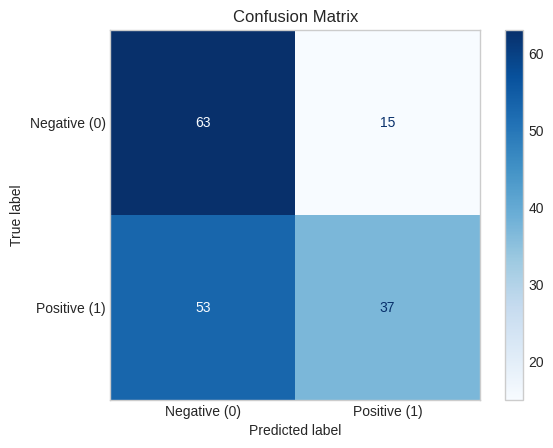


Interpretasi Confusion Matrix:
True Negative (TN): 63 (Prediksi Negatif, Aktual Negatif)
False Positive (FP): 15 (Prediksi Positif, Aktual Negatif - Type I Error)
False Negative (FN): 53 (Prediksi Negatif, Aktual Positif - Type II Error)
True Positive (TP): 37 (Prediksi Positif, Aktual Positif)


In [121]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan ConfusionMatrixDisplay dan Seaborn
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative (0)', 'Positive (1)'])
disp.plot(cmap='Blues', values_format='d') # 'd' untuk format integer
plt.title('Confusion Matrix')
plt.grid(False) # Matikan grid bawaan matplotlib jika menggunakan plot dari sklearn
plt.show()

print("\nInterpretasi Confusion Matrix:")
print(f"True Negative (TN): {cm[0,0]} (Prediksi Negatif, Aktual Negatif)")
print(f"False Positive (FP): {cm[0,1]} (Prediksi Positif, Aktual Negatif - Type I Error)")
print(f"False Negative (FN): {cm[1,0]} (Prediksi Negatif, Aktual Positif - Type II Error)")
print(f"True Positive (TP): {cm[1,1]} (Prediksi Positif, Aktual Positif)")

## **6. Tampilkan Pohon Keputusan**


Visualisasi pohon keputusan membantu memahami bagaimana model membuat keputusan.


**a. Visualisasi dengan plot_tree (Pohon Lebih Rinci):**


Untuk pohon yang sangat besar, visualisasi penuh mungkin tidak praktis. Kita akan membatasi kedalaman yang ditampilkan agar lebih mudah dibaca.


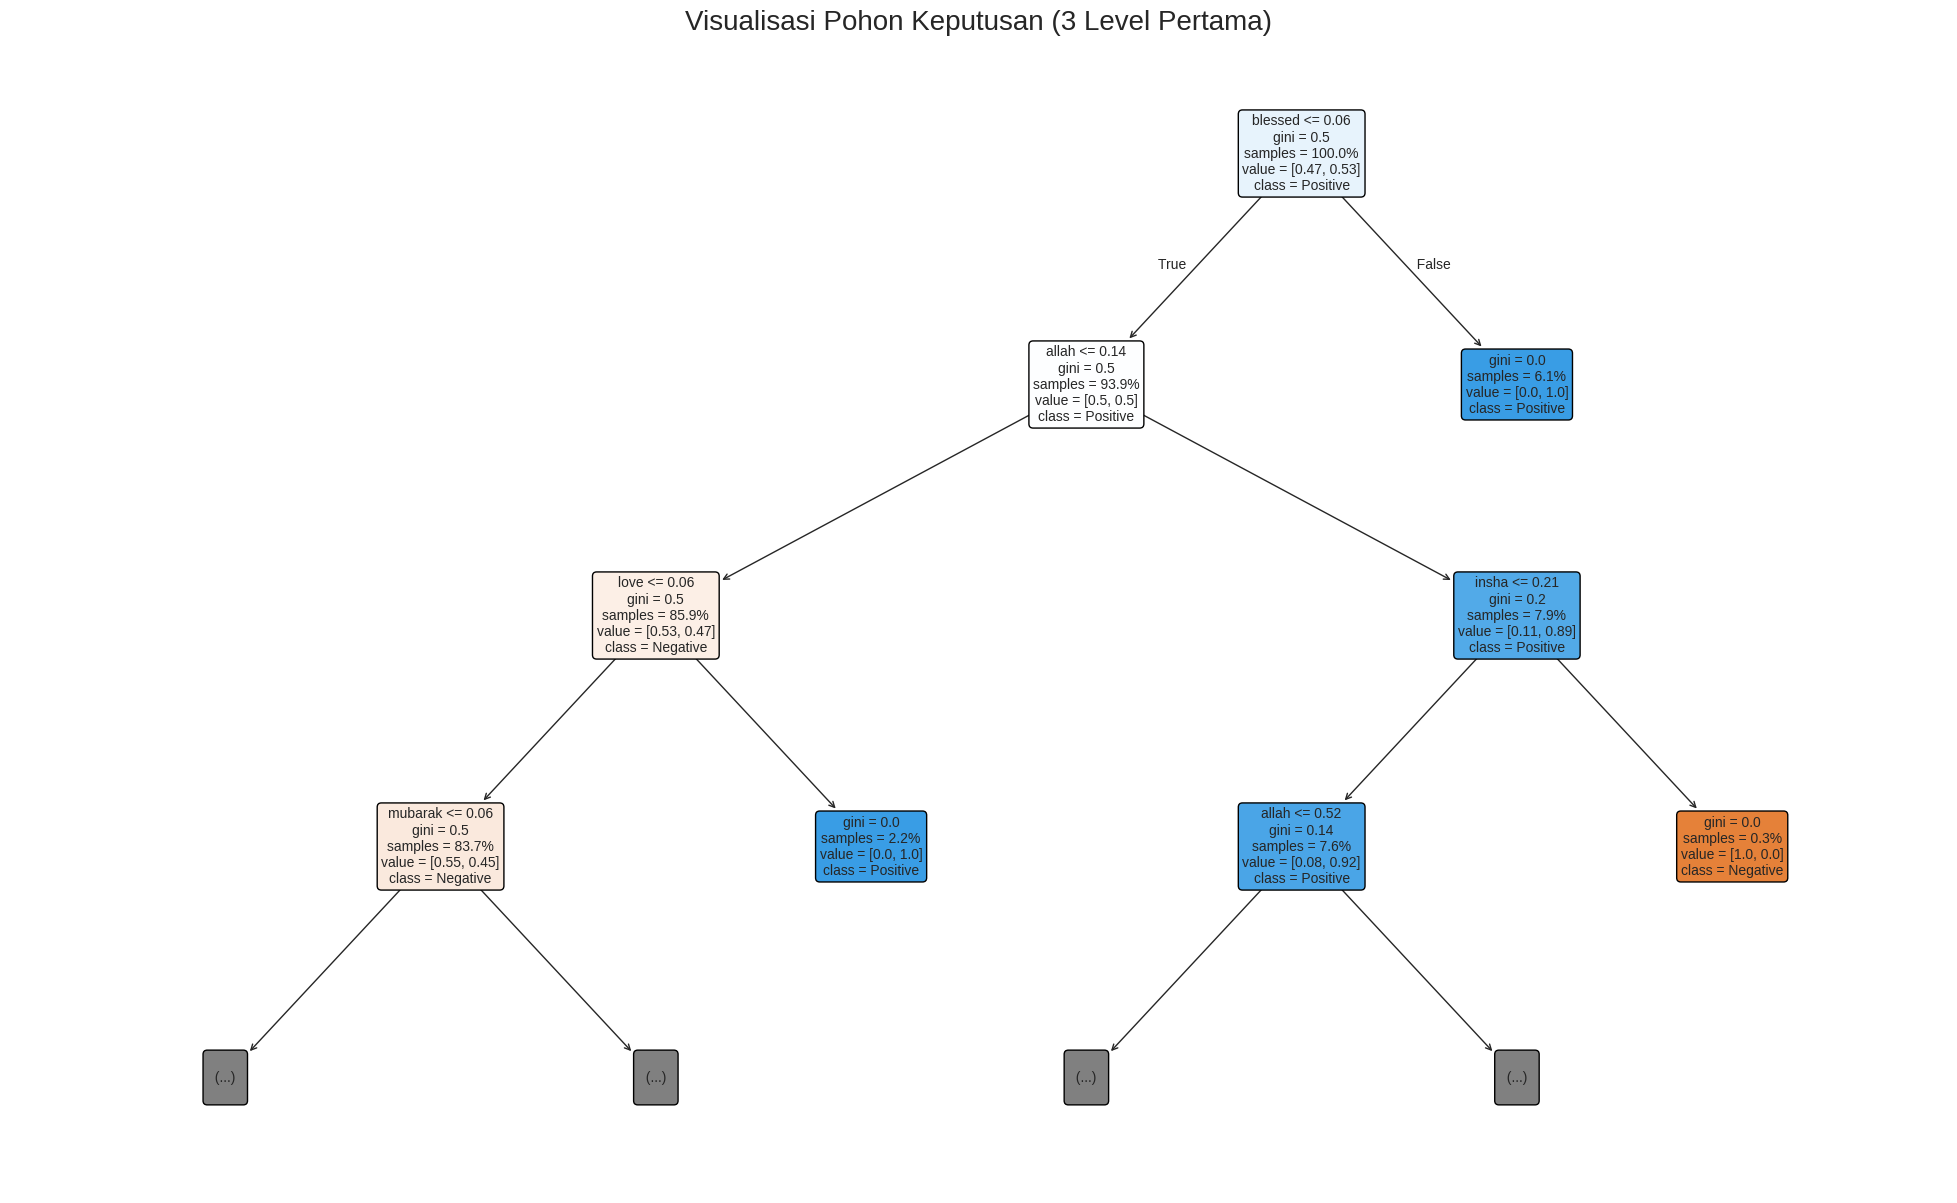

In [122]:
# Menampilkan pohon keputusan (misalnya, 3 level pertama untuk kejelasan)
plt.figure(figsize=(25, 15), dpi=100) # Ukuran bisa disesuaikan
plot_tree(
    best_dt_model,
    filled=True,
    feature_names = tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    max_depth=3,          # Batasi kedalaman pohon yang ditampilkan
    fontsize=10,
    proportion=True,      # Tampilkan proporsi sampel, bukan jumlah absolut
    rounded=True,         # Node dengan sudut membulat
    precision=2           # Jumlah angka di belakang koma untuk nilai
)
plt.title('Visualisasi Pohon Keputusan (3 Level Pertama)', fontsize=20)
plt.show()

### **b. Visualisasi dengan `graphviz` (Untuk Potensi Export):**


Ini akan menghasilkan file yang bisa disimpan dan dilihat dengan kualitas lebih baik jika pohonnya kompleks.


Visualisasi pohon keputusan dengan Graphviz telah disimpan sebagai 'decision_tree_visualization.png'
Menampilkan pratinjau pohon keputusan (jika lingkungan mendukung):


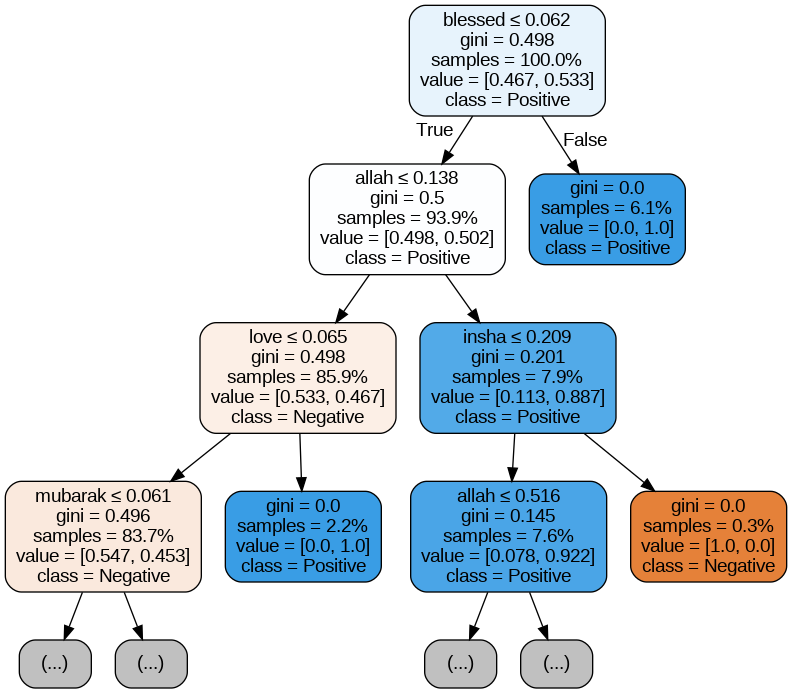

In [123]:
# Membuat file DOT untuk visualisasi Graphviz (misalnya, 2 level pertama)
dot_data = export_graphviz(
    best_dt_model,
    out_file=None,  # Tidak menyimpan ke file DOT secara langsung, tapi mengembalikan string
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    filled=True,
    rounded=True,
    max_depth=3,  # Batasi kedalaman untuk visualisasi Graphviz yang lebih ringkas
    special_characters=True,
    proportion=True,
    impurity=True,
    label='all'
)

# Merender grafik menggunakan Graphviz
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_visualization") # Menyimpan sebagai 'decision_tree_visualization.png'

print("Visualisasi pohon keputusan dengan Graphviz telah disimpan sebagai 'decision_tree_visualization.png'")
print("Menampilkan pratinjau pohon keputusan (jika lingkungan mendukung):")
# graph # Baris ini akan menampilkan grafik di notebook jika environment mendukung (seperti Jupyter/Colab)
# Jika tidak, buka file PNG yang dihasilkan.
# Untuk Colab, kadang lebih baik menampilkan file PNG langsung:
from IPython.display import Image
try:
    display(Image(filename='decision_tree_visualization.png'))
except FileNotFoundError:
    print("File PNG tidak ditemukan. Mungkin ada masalah saat rendering.")

## **- Analisis Fitur Penting (Feature Importance Analysis)**


Tahap ini menganalisis fitur (kata atau bigram) mana yang paling berpengaruh dalam membuat keputusan klasifikasi menurut model Decision Tree.


Top 20 Fitur Terpenting Menurut Model Decision Tree:


,feature,importance
24,allah,0.096260
88,blessed,0.088861
682,ramadan,0.063629
545,mubarak,0.060714
486,love,0.040820
92,blessings,0.035813
914,today,0.025150
360,happy,0.023140
81,best,0.022966
607,palestinian,0.017803


<ipython-input-124-852f0d3ee7c3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')


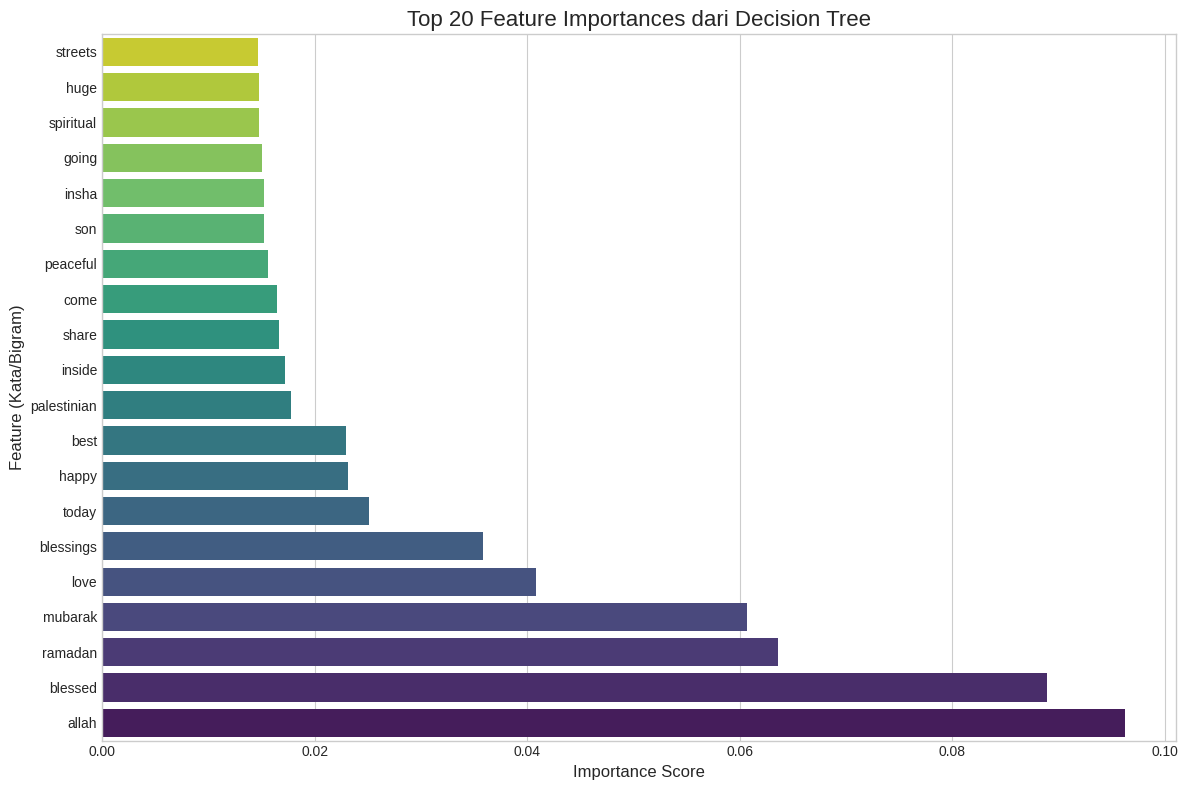

In [124]:
# Mendapatkan feature importances
importances = best_dt_model.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Membuat DataFrame untuk feature importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Menampilkan 20 fitur terpenting
top_20_features = feature_importances_df.head(20)
print("Top 20 Fitur Terpenting Menurut Model Decision Tree:")
display(top_20_features)

# Visualisasi Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances dari Decision Tree', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature (Kata/Bigram)', fontsize=12)
plt.gca().invert_yaxis() # Fitur dengan importance tertinggi di atas
plt.tight_layout()
plt.show()